In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 100000)


## 1. Modelling Support Vector Machine (SVM)

In [39]:
### Random Forest Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [40]:
# Create X and y first:

#Import data csv file as dataframe

df = pd.read_csv('./SNP500_FINAL_MODELLING.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13843 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       366 non-null float64
2_month       364 non-null float64
4_month       367 non-null float64
6_month       382 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.2+ MB


In [42]:
# drop rows first BEFORE filling in null values

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

%C-5         155
%C-10        155
%C-15        155
%C-20        155
%C-40        155
%C-63        155
%C-126       155
%C-252       155
V-5          155
V-10         155
V-15         155
V-20         155
V-40         155
V-63         155
V-126        155
V-252        155
1_month    13477
2_month    13479
4_month    13476
6_month    13461
dtype: int64

In [43]:
df[df['%C-5'].isnull()].index

Int64Index([  13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
            ...
            4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 9585, 9588], dtype='int64', length=155)

In [44]:
# Drop the null rows

df.drop(df[df['%C-5'].isnull()].index,inplace=True)

In [45]:
df.shape

(13688, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13688 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13688 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       357 non-null float64
2_month       364 non-null float64
4_month       367 non-null float64
6_month       382 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.3+ MB


In [47]:
# Fill in null month prediction columns as 0

df.fillna(0,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13688 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13688 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       13688 non-null float64
2_month       13688 non-null float64
4_month       13688 non-null float64
6_month       13688 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.3+ MB


In [49]:
# Convert 1_month, 2 month, 4 month, 6 month from float to integer
df['1_month'] = df['1_month'].apply(lambda x: int(x))
df['2_month'] = df['2_month'].apply(lambda x: int(x))
df['4_month'] = df['4_month'].apply(lambda x: int(x))
df['6_month'] = df['6_month'].apply(lambda x: int(x))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13688 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13688 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       13688 non-null int64
2_month       13688 non-null int64
4_month       13688 non-null int64
6_month       13688 non-null int64
dtypes: float64(16), int64(4), object(1)
memory usage: 2.3+ MB


In [51]:
# Split the dataframe into X and y

# y for 1 month, 2 months, 4 months, 6 months
y = df.iloc[:,-4:]


In [52]:
print(y)
print(y.shape)

       1_month  2_month  4_month  6_month
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            0        0        0        0
4            0        0        0        0
5            0        0        0        0
6            0        0        0        0
7            0        0        0        0
8            0        0        0        0
9            0        0        0        0
10           0        0        0        0
11           0        0        0        0
12           0        0        0        0
23           0        0        0        0
24           0        0        0        0
25           0        0        0        0
26           0        0        0        0
27           0        0        0        0
28           0        0        0        0
29           0        0        0        0
30           0        0        0        0
31           0        0        0        0
32           0        0        0  

In [53]:
# Get the X dataset.

X = df.iloc[:,0:-4]
X.shape

(13688, 17)

In [54]:
X.head()

,Unnamed: 0,%C-5,%C-10,%C-15,%C-20,%C-40,%C-63,%C-126,%C-252,V-5,V-10,V-15,V-20,V-40,V-63,V-126,V-252
0,1963-01-16,-0.021163,0.328808,0.799549,0.274763,0.061327,0.473675,0.094699,-0.154771,0.322841,0.343279,0.354363,0.245459,0.359105,0.411642,0.493623,0.484781
1,1963-01-17,0.160182,0.328808,0.593952,-0.191453,0.086368,0.443217,0.070517,-0.135479,0.306549,0.343279,0.350887,0.263085,0.355242,0.386048,0.500806,0.482150
2,1963-01-18,0.150649,0.416720,1.186288,0.462851,0.006460,0.494258,0.088584,-0.112206,0.295605,0.343984,0.350317,0.290498,0.351490,0.354324,0.504155,0.479234
3,1963-01-21,0.097354,-0.021163,0.328808,0.681132,0.008002,0.340903,0.059636,-0.082731,0.255690,0.322841,0.343279,0.323934,0.355630,0.343552,0.507896,0.477054
4,1963-01-22,0.434756,0.160182,0.328808,0.593952,0.139718,0.403966,0.083428,-0.096102,0.260694,0.306549,0.343279,0.350887,0.359386,0.338232,0.511376,0.473586


In [55]:
# drop the Unnamed column, date column

X.drop(columns='Unnamed: 0',inplace=True)

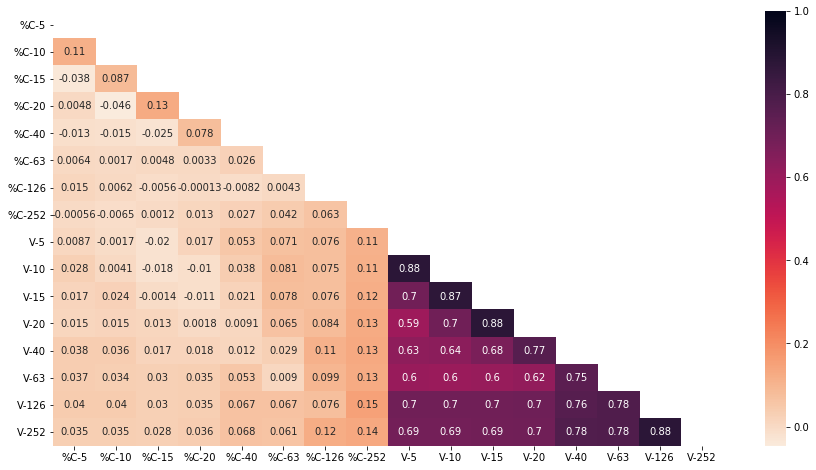

In [56]:
# Look at correlation between the features:
plt.figure(figsize=(15,8))
corr1 = X.corr()
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr1, annot=True, cmap='rocket_r',mask=mask)
#plt.title('Correlation of Close Price between Major stock indexes',fontdict={'fontsize':15})

In [57]:
print(X.shape)
print(y.shape)

(13688, 16)
(13688, 4)


## Baseline Model for KNN

In [58]:
# split train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9581, 16)
(9581, 4)
(4107, 16)
(4107, 4)


In [60]:
# SPLIT y_train and y_test into respective columns 1 month, 2 month, 4 months and 6 months!

y1_train = y_train.iloc[:,-4]
y2_train = y_train.iloc[:,-3]
y4_train = y_train.iloc[:,-2]
y6_train = y_train.iloc[:,-1]

y1_test = y_test.iloc[:,-4]
y2_test = y_test.iloc[:,-3]
y4_test = y_test.iloc[:,-2]
y6_test = y_test.iloc[:,-1]

In [61]:
print(y1_train.shape)
print(y2_train.shape)
print(y4_train.shape)
print(y6_train.shape)

print(y1_test.shape)
print(y2_test.shape)
print(y4_test.shape)
print(y6_test.shape)

(9581,)
(9581,)
(9581,)
(9581,)
(4107,)
(4107,)
(4107,)
(4107,)


In [63]:
# Create 1 instance of model for EACH month and fit the model to the relevant data

knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()
knn4 = KNeighborsClassifier()
knn6 = KNeighborsClassifier()

knn1.fit(X_train, y1_train)
knn2.fit(X_train, y2_train)
knn4.fit(X_train, y4_train)
knn6.fit(X_train, y6_train)

cross_val_score(knn1, X_train, y1_train, cv=10, scoring='recall')

array([0.08, 0.04, 0.08, 0.04, 0.04, 0.08, 0.12, 0.04, 0.2 , 0.08])

In [64]:
# The predicted values from the model

predicted1_month = knn1.predict(X_test)
predicted2_month = knn2.predict(X_test)
predicted4_month = knn4.predict(X_test)
predicted6_month = knn6.predict(X_test)



In [65]:
# The predicted probability for each row for each model

knn1.predict_proba(X_test)
knn2.predict_proba(X_test)
knn4.predict_proba(X_test)
knn6.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [66]:
# for 1 month

baseline_con1 = pd.DataFrame(confusion_matrix(y1_test, predicted1_month),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con1)
print('\n')
print('---------------------------------------------------')
print(classification_report(y1_test, predicted1_month))
print('\n')
print('---------------------------------------------------')
print('y1_month_value_counts:','\n',y1_test.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(y1_test, predicted1_month)
recall = metrics.recall_score(y1_test, predicted1_month)
precision = metrics.precision_score(y1_test, predicted1_month)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3991                9
Crash                     91               16


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4000
           1       0.64      0.15      0.24       107

   micro avg       0.98      0.98      0.98      4107
   macro avg       0.81      0.57      0.62      4107
weighted avg       0.97      0.98      0.97      4107



---------------------------------------------------
y1_month_value_counts: 
 0    4000
1     107
Name: 1_month, dtype: int64
---------------------------------------------------
accuracy: 0.9756513270026783
recall: 0.14953271028037382
precision: 0.64


In [67]:
# for 2 months

baseline_con2 = pd.DataFrame(confusion_matrix(y2_test, predicted2_month),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con2)
print('\n')
print('---------------------------------------------------')
print(classification_report(y2_test, predicted2_month))
print('\n')
print('---------------------------------------------------')
print('y2_month_value_counts:','\n',y2_test.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(y2_test, predicted2_month)
recall = metrics.recall_score(y2_test, predicted2_month)
precision = metrics.precision_score(y2_test, predicted2_month)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3991                7
Crash                     94               15


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3998
           1       0.68      0.14      0.23       109

   micro avg       0.98      0.98      0.98      4107
   macro avg       0.83      0.57      0.61      4107
weighted avg       0.97      0.98      0.97      4107



---------------------------------------------------
y2_month_value_counts: 
 0    3998
1     109
Name: 2_month, dtype: int64
---------------------------------------------------
accuracy: 0.9754078402727051
recall: 0.13761467889908258
precision: 0.6818181818181818


In [68]:
# for 4 months

baseline_con4 = pd.DataFrame(confusion_matrix(y4_test, predicted4_month),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con4)
print('\n')
print('---------------------------------------------------')
print(classification_report(y4_test, predicted4_month))
print('\n')
print('---------------------------------------------------')
print('y4_month_value_counts:','\n',y4_test.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(y4_test, predicted4_month)
recall = metrics.recall_score(y4_test, predicted4_month)
precision = metrics.precision_score(y4_test, predicted4_month)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3991                6
Crash                     96               14


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3997
           1       0.70      0.13      0.22       110

   micro avg       0.98      0.98      0.98      4107
   macro avg       0.84      0.56      0.60      4107
weighted avg       0.97      0.98      0.97      4107



---------------------------------------------------
y4_month_value_counts: 
 0    3997
1     110
Name: 4_month, dtype: int64
---------------------------------------------------
accuracy: 0.9751643535427319
recall: 0.12727272727272726
precision: 0.7


In [69]:
# for 6 months

baseline_con6 = pd.DataFrame(confusion_matrix(y6_test, predicted6_month),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con6)
print('\n')
print('---------------------------------------------------')
print(classification_report(y6_test, predicted6_month))
print('\n')
print('---------------------------------------------------')
print('y6_month_value_counts:','\n',y6_test.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(y6_test, predicted6_month)
recall = metrics.recall_score(y6_test, predicted6_month)
precision = metrics.precision_score(y6_test, predicted6_month)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3991                2
Crash                     98               16


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3993
           1       0.89      0.14      0.24       114

   micro avg       0.98      0.98      0.98      4107
   macro avg       0.93      0.57      0.62      4107
weighted avg       0.97      0.98      0.97      4107



---------------------------------------------------
y6_month_value_counts: 
 0    3993
1     114
Name: 6_month, dtype: int64
---------------------------------------------------
accuracy: 0.9756513270026783
recall: 0.14035087719298245
precision: 0.8888888888888888


## Model performance is similar to Random Forest, let's try to do gridsearch to see if it improves the result

In [78]:
# The default model for KNN is as follows:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'
                     


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
# First call back the ORIGINAL DATAFRAME AFTER CLEANING:
# and determine the number of 0 and 1 in each predictor target column

# COMBINING BOTH train and test datasets

print(df['1_month'].value_counts())
print(df['2_month'].value_counts())
print(df['4_month'].value_counts())
print(df['6_month'].value_counts())


0    13331
1      357
Name: 1_month, dtype: int64
0    13324
1      364
Name: 2_month, dtype: int64
0    13321
1      367
Name: 4_month, dtype: int64
0    13306
1      382
Name: 6_month, dtype: int64


### 1st Approach: Downsample majority classes, n = 1000

In [71]:
# import library for sampling
from sklearn.utils import resample

In [72]:
# Percentage of minority/crashes:

print('1_month crash:',df['1_month'].value_counts()[1]/df['1_month'].value_counts()[0]*100)
print('2_month crash:',df['2_month'].value_counts()[1]/df['2_month'].value_counts()[0]*100)
print('4_month crash:',df['4_month'].value_counts()[1]/df['4_month'].value_counts()[0]*100)
print('6_month crash:',df['6_month'].value_counts()[1]/df['6_month'].value_counts()[0]*100)

1_month crash: 2.6779686445127897
2_month crash: 2.731912338637046
4_month crash: 2.7550484197883045
6_month crash: 2.870885314895536


In [73]:
# Create subsets for each predictor target column for major (0) and minor (1) classes

# 1 month
data_maj1 = df[df['1_month']==0] # a df where all in 1_month are 0
data_min1 = df[df['1_month']==1] # a df where all in 1_month are 1

# 2 months
data_maj2 = df[df['2_month']==0]
data_min2 = df[df['2_month']==1]

# 4 months
data_maj4 = df[df['4_month']==0]
data_min4 = df[df['4_month']==1]

# 6 months
data_maj6 = df[df['6_month']==0]
data_min6 = df[df['6_month']==1]

In [74]:
# DOWNSAMPLE THE ORIGINAL month column first BEFORE SPLITTING

In [75]:
df_downsample1 = resample(data_maj1, replace=False, n_samples =1000, random_state = 1)
df_downsample2 = resample(data_maj2, replace=False, n_samples =1000, random_state = 1)
df_downsample4 = resample(data_maj4, replace=False, n_samples =1000, random_state = 1)
df_downsample6 = resample(data_maj6, replace=False, n_samples =1000, random_state = 1)


# add the downsample dataframe with the minimum class:

df_downsample1 = pd.concat([df_downsample1,data_min1])
df_downsample2 = pd.concat([df_downsample2,data_min2])
df_downsample4 = pd.concat([df_downsample4,data_min4])
df_downsample6 = pd.concat([df_downsample6,data_min6])

# Drop the date column, 'Unnamed: 0'
df_downsample1.drop(columns='Unnamed: 0',inplace=True)
df_downsample2.drop(columns='Unnamed: 0',inplace=True)
df_downsample4.drop(columns='Unnamed: 0',inplace=True)
df_downsample6.drop(columns='Unnamed: 0',inplace=True)


In [76]:
X_down1 = df_downsample1.iloc[:,:-4]
X_down2 = df_downsample2.iloc[:,:-4]
X_down4 = df_downsample4.iloc[:,:-4]
X_down6 = df_downsample6.iloc[:,:-4]

y_down1 = df_downsample1.iloc[:,-4]
y_down2 = df_downsample2.iloc[:,-3]
y_down4 = df_downsample4.iloc[:,-2]
y_down6 = df_downsample6.iloc[:,-1]

#checking shape tp ensure that shape is correct
print('X_down shape for each month----------------------------------------------')
print(X_down1.shape)
print(X_down2.shape)
print(X_down4.shape)
print(X_down6.shape)
print('y_down shape for each month----------------------------------------------')
print(y_down1.shape)
print(y_down2.shape)
print(y_down4.shape)
print(y_down6.shape)
print('Checking the ratio of major to minor classes after resampling------------')
print(y_down1.value_counts())
print(y_down2.value_counts())
print(y_down4.value_counts())
print(y_down6.value_counts())

X_down shape for each month----------------------------------------------
(1357, 16)
(1364, 16)
(1367, 16)
(1382, 16)
y_down shape for each month----------------------------------------------
(1357,)
(1364,)
(1367,)
(1382,)
Checking the ratio of major to minor classes after resampling------------
0    1000
1     357
Name: 1_month, dtype: int64
0    1000
1     364
Name: 2_month, dtype: int64
0    1000
1     367
Name: 4_month, dtype: int64
0    1000
1     382
Name: 6_month, dtype: int64


In [77]:
# Split into X and y train, test 

Xd1_train, Xd1_test, yd1_train, yd1_test = train_test_split(X_down1,y_down1,test_size=0.3, random_state=42,stratify=y_down1)

Xd2_train, Xd2_test, yd2_train, yd2_test = train_test_split(X_down2,y_down2,test_size=0.3, random_state=42,stratify=y_down2)
Xd4_train, Xd4_test, yd4_train, yd4_test = train_test_split(X_down4,y_down4,test_size=0.3, random_state=42,stratify=y_down4)
Xd6_train, Xd6_test, yd6_train, yd6_test = train_test_split(X_down6,y_down6,test_size=0.3, random_state=42,stratify=y_down6)

In [105]:
# Using cross validation default (cv =3)

lr1_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr2_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr4_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr6_down = RandomForestClassifier(verbose=1,n_estimators=10)

lr1_down.fit(Xd1_train, yd1_train)
lr2_down.fit(Xd2_train, yd2_train)
lr4_down.fit(Xd4_train, yd4_train)
lr6_down.fit(Xd6_train, yd6_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [106]:
predicted1_month_down = lr1_down.predict(Xd1_test)
predicted2_month_down = lr2_down.predict(Xd2_test)
predicted4_month_down = lr4_down.predict(Xd4_test)
predicted6_month_down = lr6_down.predict(Xd6_test)

# Predict Proba, put the predict proba array into a dataframe
lr1_down.predict_proba(Xd1_test)
lr2_down.predict_proba(Xd2_test)
lr4_down.predict_proba(Xd4_test)
lr6_down.predict_proba(Xd6_test)

log_pp_down1 = pd.DataFrame(lr1_down.predict_proba(Xd1_test),columns=['No Crash','Crashes'])
log_pp_down2 = pd.DataFrame(lr2_down.predict_proba(Xd2_test),columns=['No Crash','Crashes'])
log_pp_down4 = pd.DataFrame(lr4_down.predict_proba(Xd4_test),columns=['No Crash','Crashes'])
log_pp_down6 = pd.DataFrame(lr6_down.predict_proba(Xd6_test),columns=['No Crash','Crashes'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [107]:
# for 1 month

baseline_con1_down = pd.DataFrame(confusion_matrix(yd1_test, predicted1_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con1_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd1_test, predicted1_month_down))
print('\n')
print('---------------------------------------------------')
print('y1_month_value_counts(test):','\n',yd1_test.value_counts())
print('---------------------------------------------------')
print('y1_month_train:','\n',yd1_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd1_test, predicted1_month_down)
recall = metrics.recall_score(yd1_test, predicted1_month_down)
precision = metrics.precision_score(yd1_test, predicted1_month_down)
fpr1, tpr1, _ = roc_curve(yd1_test,log_pp_down1['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 286               15
Crash                     59               48


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       301
           1       0.76      0.45      0.56       107

   micro avg       0.82      0.82      0.82       408
   macro avg       0.80      0.70      0.73       408
weighted avg       0.81      0.82      0.80       408



---------------------------------------------------
y1_month_value_counts(test): 
 0    301
1    107
Name: 1_month, dtype: int64
---------------------------------------------------
y1_month_train: 
 0    699
1    250
Name: 1_month, dtype: int64
---------------------------------------------------
accuracy: 0.8186274509803921
recall: 0.4485981308411215
precision: 0.7619047619047619
roc_auc_score: 0.8319930449902195


In [108]:
# for 2 months

baseline_con2_down = pd.DataFrame(confusion_matrix(yd2_test, predicted2_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con2_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd2_test, predicted2_month_down))
print('\n')
print('---------------------------------------------------')
print('y2_month_value_counts(test):','\n',yd2_test.value_counts())
print('---------------------------------------------------')
print('y2_month_train:','\n',yd2_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd2_test, predicted2_month_down)
recall = metrics.recall_score(yd2_test, predicted2_month_down)
precision = metrics.precision_score(yd2_test, predicted2_month_down)
fpr2, tpr2, _ = roc_curve(yd2_test,log_pp_down2['Crashes'])
roc_auc_score = auc(fpr2,tpr2)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 269               32
Crash                     46               63


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       301
           1       0.66      0.58      0.62       109

   micro avg       0.81      0.81      0.81       410
   macro avg       0.76      0.74      0.75       410
weighted avg       0.80      0.81      0.81       410



---------------------------------------------------
y2_month_value_counts(test): 
 0    301
1    109
Name: 2_month, dtype: int64
---------------------------------------------------
y2_month_train: 
 0    699
1    255
Name: 2_month, dtype: int64
---------------------------------------------------
accuracy: 0.8097560975609757
recall: 0.5779816513761468
precision: 0.6631578947368421
roc_auc_score: 0.8626443963546588


In [109]:
# for 4 months

baseline_con4_down = pd.DataFrame(confusion_matrix(yd4_test, predicted4_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con4_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd4_test, predicted4_month_down))
print('\n')
print('---------------------------------------------------')
print('y4_month_value_counts(test):','\n',yd4_test.value_counts())
print('---------------------------------------------------')
print('y4_month_train:','\n',yd4_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd4_test, predicted4_month_down)
recall = metrics.recall_score(yd4_test, predicted4_month_down)
precision = metrics.precision_score(yd4_test, predicted4_month_down)
fpr4, tpr4, _ = roc_curve(yd4_test,log_pp_down4['Crashes'])
roc_auc_score = auc(fpr4,tpr4)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 288               13
Crash                     66               44


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       301
           1       0.77      0.40      0.53       110

   micro avg       0.81      0.81      0.81       411
   macro avg       0.79      0.68      0.70       411
weighted avg       0.80      0.81      0.79       411



---------------------------------------------------
y4_month_value_counts(test): 
 0    301
1    110
Name: 4_month, dtype: int64
---------------------------------------------------
y4_month_train: 
 0    699
1    257
Name: 4_month, dtype: int64
---------------------------------------------------
accuracy: 0.8077858880778589
recall: 0.4
precision: 0.7719298245614035
roc_auc_score: 0.8380851706433102


In [110]:
# for 6 months

baseline_con6_down = pd.DataFrame(confusion_matrix(yd6_test, predicted6_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con6_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd6_test, predicted6_month_down))
print('\n')
print('---------------------------------------------------')
print('y6_month_value_counts(test):','\n',yd6_test.value_counts())
print('---------------------------------------------------')
print('y6_month_train:','\n',yd6_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd6_test, predicted6_month_down)
recall = metrics.recall_score(yd6_test, predicted6_month_down)
precision = metrics.precision_score(yd6_test, predicted6_month_down)
fpr6, tpr6, _ = roc_curve(yd6_test,log_pp_down6['Crashes'])
roc_auc_score = auc(fpr6,tpr6)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 292                8
Crash                     53               62


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       300
           1       0.89      0.54      0.67       115

   micro avg       0.85      0.85      0.85       415
   macro avg       0.87      0.76      0.79       415
weighted avg       0.86      0.85      0.84       415



---------------------------------------------------
y6_month_value_counts(test): 
 0    300
1    115
Name: 6_month, dtype: int64
---------------------------------------------------
y6_month_train: 
 0    700
1    267
Name: 6_month, dtype: int64
---------------------------------------------------
accuracy: 0.8530120481927711
recall: 0.5391304347826087
precision: 0.8857142857142857
roc_auc_score: 0.9148260869565218


### 1st Approach: Downsample majority classes, n = 2000
- Try to see if the model improves with a larger majority class (TESTING)

In [111]:
df_downsample1 = resample(data_maj1, replace=False, n_samples =2000, random_state = 1)
df_downsample2 = resample(data_maj2, replace=False, n_samples =2000, random_state = 1)
df_downsample4 = resample(data_maj4, replace=False, n_samples =2000, random_state = 1)
df_downsample6 = resample(data_maj6, replace=False, n_samples =2000, random_state = 1)


# add the downsample dataframe with the minimum class:

df_downsample1 = pd.concat([df_downsample1,data_min1])
df_downsample2 = pd.concat([df_downsample2,data_min2])
df_downsample4 = pd.concat([df_downsample4,data_min4])
df_downsample6 = pd.concat([df_downsample6,data_min6])

# Drop the date column, 'Unnamed: 0'
df_downsample1.drop(columns='Unnamed: 0',inplace=True)
df_downsample2.drop(columns='Unnamed: 0',inplace=True)
df_downsample4.drop(columns='Unnamed: 0',inplace=True)
df_downsample6.drop(columns='Unnamed: 0',inplace=True)

In [112]:
# Split the data into X and y (these are the new X and y)

X_down1 = df_downsample1.iloc[:,:-4]
X_down2 = df_downsample2.iloc[:,:-4]
X_down4 = df_downsample4.iloc[:,:-4]
X_down6 = df_downsample6.iloc[:,:-4]

y_down1 = df_downsample1.iloc[:,-4]
y_down2 = df_downsample2.iloc[:,-3]
y_down4 = df_downsample4.iloc[:,-2]
y_down6 = df_downsample6.iloc[:,-1]

#checking shape tp ensure that shape is correct
print('X_down shape for each month----------------------------------------------')
print(X_down1.shape)
print(X_down2.shape)
print(X_down4.shape)
print(X_down6.shape)
print('y_down shape for each month----------------------------------------------')
print(y_down1.shape)
print(y_down2.shape)
print(y_down4.shape)
print(y_down6.shape)
print('Checking the ratio of major to minor classes after resampling------------')
print(y_down1.value_counts())
print(y_down2.value_counts())
print(y_down4.value_counts())
print(y_down6.value_counts())

X_down shape for each month----------------------------------------------
(2357, 16)
(2364, 16)
(2367, 16)
(2382, 16)
y_down shape for each month----------------------------------------------
(2357,)
(2364,)
(2367,)
(2382,)
Checking the ratio of major to minor classes after resampling------------
0    2000
1     357
Name: 1_month, dtype: int64
0    2000
1     364
Name: 2_month, dtype: int64
0    2000
1     367
Name: 4_month, dtype: int64
0    2000
1     382
Name: 6_month, dtype: int64


In [113]:
# Split into X and y train, test 

Xd1_train, Xd1_test, yd1_train, yd1_test = train_test_split(X_down1,y_down1,test_size=0.3, random_state=42,stratify=y_down1)

Xd2_train, Xd2_test, yd2_train, yd2_test = train_test_split(X_down2,y_down2,test_size=0.3, random_state=42,stratify=y_down2)
Xd4_train, Xd4_test, yd4_train, yd4_test = train_test_split(X_down4,y_down4,test_size=0.3, random_state=42,stratify=y_down4)
Xd6_train, Xd6_test, yd6_train, yd6_test = train_test_split(X_down6,y_down6,test_size=0.3, random_state=42,stratify=y_down6)

In [114]:
# Using cross validation default (cv =3)

lr1_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr2_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr4_down = RandomForestClassifier(verbose=1,n_estimators=10)
lr6_down = RandomForestClassifier(verbose=1,n_estimators=10)

lr1_down.fit(Xd1_train, yd1_train)
lr2_down.fit(Xd2_train, yd2_train)
lr4_down.fit(Xd4_train, yd4_train)
lr6_down.fit(Xd6_train, yd6_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [115]:
predicted1_month_down = lr1_down.predict(Xd1_test)
predicted2_month_down = lr2_down.predict(Xd2_test)
predicted4_month_down = lr4_down.predict(Xd4_test)
predicted6_month_down = lr6_down.predict(Xd6_test)

# Predict Proba, put the predict proba array into a dataframe
lr1_down.predict_proba(Xd1_test)
lr2_down.predict_proba(Xd2_test)
lr4_down.predict_proba(Xd4_test)
lr6_down.predict_proba(Xd6_test)

log_pp_down1 = pd.DataFrame(lr1_down.predict_proba(Xd1_test),columns=['No Crash','Crashes'])
log_pp_down2 = pd.DataFrame(lr2_down.predict_proba(Xd2_test),columns=['No Crash','Crashes'])
log_pp_down4 = pd.DataFrame(lr4_down.predict_proba(Xd4_test),columns=['No Crash','Crashes'])
log_pp_down6 = pd.DataFrame(lr6_down.predict_proba(Xd6_test),columns=['No Crash','Crashes'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [116]:
# for 1 month

baseline_con1_down = pd.DataFrame(confusion_matrix(yd1_test, predicted1_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con1_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd1_test, predicted1_month_down))
print('\n')
print('---------------------------------------------------')
print('y1_month_value_counts(test):','\n',yd1_test.value_counts())
print('---------------------------------------------------')
print('y1_month_train:','\n',yd1_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd1_test, predicted1_month_down)
recall = metrics.recall_score(yd1_test, predicted1_month_down)
precision = metrics.precision_score(yd1_test, predicted1_month_down)
fpr1, tpr1, _ = roc_curve(yd1_test,log_pp_down1['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 592                9
Crash                     69               38


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       601
           1       0.81      0.36      0.49       107

   micro avg       0.89      0.89      0.89       708
   macro avg       0.85      0.67      0.72       708
weighted avg       0.88      0.89      0.87       708



---------------------------------------------------
y1_month_value_counts(test): 
 0    601
1    107
Name: 1_month, dtype: int64
---------------------------------------------------
y1_month_train: 
 0    1399
1     250
Name: 1_month, dtype: int64
---------------------------------------------------
accuracy: 0.8898305084745762
recall: 0.35514018691588783
precision: 0.8085106382978723
roc_auc_score: 0.8855490071065357


In [117]:
# for 2 months

baseline_con2_down = pd.DataFrame(confusion_matrix(yd2_test, predicted2_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con2_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd2_test, predicted2_month_down))
print('\n')
print('---------------------------------------------------')
print('y2_month_value_counts(test):','\n',yd2_test.value_counts())
print('---------------------------------------------------')
print('y2_month_train:','\n',yd2_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd2_test, predicted2_month_down)
recall = metrics.recall_score(yd2_test, predicted2_month_down)
precision = metrics.precision_score(yd2_test, predicted2_month_down)
fpr2, tpr2, _ = roc_curve(yd2_test,log_pp_down2['Crashes'])
roc_auc_score = auc(fpr2,tpr2)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 588               13
Crash                     70               39


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       601
           1       0.75      0.36      0.48       109

   micro avg       0.88      0.88      0.88       710
   macro avg       0.82      0.67      0.71       710
weighted avg       0.87      0.88      0.87       710



---------------------------------------------------
y2_month_value_counts(test): 
 0    601
1    109
Name: 2_month, dtype: int64
---------------------------------------------------
y2_month_train: 
 0    1399
1     255
Name: 2_month, dtype: int64
---------------------------------------------------
accuracy: 0.8830985915492958
recall: 0.3577981651376147
precision: 0.75
roc_auc_score: 0.9020058312598269


In [118]:
# for 4 months

baseline_con4_down = pd.DataFrame(confusion_matrix(yd4_test, predicted4_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con4_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd4_test, predicted4_month_down))
print('\n')
print('---------------------------------------------------')
print('y4_month_value_counts(test):','\n',yd4_test.value_counts())
print('---------------------------------------------------')
print('y4_month_train:','\n',yd4_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd4_test, predicted4_month_down)
recall = metrics.recall_score(yd4_test, predicted4_month_down)
precision = metrics.precision_score(yd4_test, predicted4_month_down)
fpr4, tpr4, _ = roc_curve(yd4_test,log_pp_down4['Crashes'])
roc_auc_score = auc(fpr4,tpr4)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 599                2
Crash                     74               36


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       601
           1       0.95      0.33      0.49       110

   micro avg       0.89      0.89      0.89       711
   macro avg       0.92      0.66      0.71       711
weighted avg       0.90      0.89      0.87       711



---------------------------------------------------
y4_month_value_counts(test): 
 0    601
1    110
Name: 4_month, dtype: int64
---------------------------------------------------
y4_month_train: 
 0    1399
1     257
Name: 4_month, dtype: int64
---------------------------------------------------
accuracy: 0.8931082981715893
recall: 0.32727272727272727
precision: 0.9473684210526315
roc_auc_score: 0.9282483739222508


In [119]:
# for 6 months

baseline_con6_down = pd.DataFrame(confusion_matrix(yd6_test, predicted6_month_down),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con6_down)
print('\n')
print('---------------------------------------------------')
print(classification_report(yd6_test, predicted6_month_down))
print('\n')
print('---------------------------------------------------')
print('y6_month_value_counts(test):','\n',yd6_test.value_counts())
print('---------------------------------------------------')
print('y6_month_train:','\n',yd6_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yd6_test, predicted6_month_down)
recall = metrics.recall_score(yd6_test, predicted6_month_down)
precision = metrics.precision_score(yd6_test, predicted6_month_down)
fpr6, tpr6, _ = roc_curve(yd6_test,log_pp_down6['Crashes'])
roc_auc_score = auc(fpr6,tpr6)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                 592                8
Crash                     66               49


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       600
           1       0.86      0.43      0.57       115

   micro avg       0.90      0.90      0.90       715
   macro avg       0.88      0.71      0.76       715
weighted avg       0.89      0.90      0.88       715



---------------------------------------------------
y6_month_value_counts(test): 
 0    600
1    115
Name: 6_month, dtype: int64
---------------------------------------------------
y6_month_train: 
 0    1400
1     267
Name: 6_month, dtype: int64
---------------------------------------------------
accuracy: 0.8965034965034965
recall: 0.4260869565217391
precision: 0.8596491228070176
roc_auc_score: 0.9355072463768117


#### Conclusion: Downsampling majority appears to perform better compared to the default model/baseline model. Lets try the upsample 

<div class="alert alert-danger">
    
### 2nd Approach: Upsample minority classes n = 1000
- Original is only about 300 plus

In [120]:
df_upsample1 = resample(data_min1, replace=True, n_samples =1000, random_state = 1)
df_upsample2 = resample(data_min2, replace=True, n_samples =1000, random_state = 1)
df_upsample4 = resample(data_min4, replace=True, n_samples =1000, random_state = 1)
df_upsample6 = resample(data_min6, replace=True, n_samples =1000, random_state = 1)


#Use back same name for df after concatenating with the minority classes
df_upsample1 = pd.concat([df_upsample1,data_maj1])
df_upsample2 = pd.concat([df_upsample2,data_maj2])
df_upsample4 = pd.concat([df_upsample4,data_maj4])
df_upsample6 = pd.concat([df_upsample6,data_maj6])

# Drop the 1st column
df_upsample1.drop(columns='Unnamed: 0',inplace=True)
df_upsample2.drop(columns='Unnamed: 0',inplace=True)
df_upsample4.drop(columns='Unnamed: 0',inplace=True)
df_upsample6.drop(columns='Unnamed: 0',inplace=True)

In [121]:
# Split the data into X and y (these are the new X_train, y_train)

X_up1 = df_upsample1.iloc[:,:-4]
X_up2 = df_upsample2.iloc[:,:-4]
X_up4 = df_upsample4.iloc[:,:-4]
X_up6 = df_upsample6.iloc[:,:-4]

y_up1 = df_upsample1.iloc[:,-4]
y_up2 = df_upsample2.iloc[:,-3]
y_up4 = df_upsample4.iloc[:,-2]
y_up6 = df_upsample6.iloc[:,-1]

#checking shape tp ensure that shape is correct
print('X_up shape for each month----------------------------------------------')
print(X_up1.shape)
print(X_up2.shape)
print(X_up4.shape)
print(X_up6.shape)
print('y_up shape for each month----------------------------------------------')
print(y_up1.shape)
print(y_up2.shape)
print(y_up4.shape)
print(y_up6.shape)
print('Checking the ratio of major to minor classes after resampling------------')
print(y_up1.value_counts())
print(y_up2.value_counts())
print(y_up4.value_counts())
print(y_up6.value_counts())

X_up shape for each month----------------------------------------------
(14331, 16)
(14324, 16)
(14321, 16)
(14306, 16)
y_up shape for each month----------------------------------------------
(14331,)
(14324,)
(14321,)
(14306,)
Checking the ratio of major to minor classes after resampling------------
0    13331
1     1000
Name: 1_month, dtype: int64
0    13324
1     1000
Name: 2_month, dtype: int64
0    13321
1     1000
Name: 4_month, dtype: int64
0    13306
1     1000
Name: 6_month, dtype: int64


In [122]:
# Split into X and y train, test 

Xu1_train, Xu1_test, yu1_train, yu1_test = train_test_split(X_up1,y_up1,test_size=0.3, random_state=42,stratify=y_up1)

Xu2_train, Xu2_test, yu2_train, yu2_test = train_test_split(X_up2,y_up2,test_size=0.3, random_state=42,stratify=y_up2)
Xu4_train, Xu4_test, yu4_train, yu4_test = train_test_split(X_up4,y_up4,test_size=0.3, random_state=42,stratify=y_up4)
Xu6_train, Xu6_test, yu6_train, yu6_test = train_test_split(X_up6,y_up6,test_size=0.3, random_state=42,stratify=y_up6)

In [124]:
# Using cross validation default (cv =3)

lr1_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr2_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr4_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr6_up = RandomForestClassifier(verbose=1,n_estimators=10)

lr1_up.fit(Xu1_train, yu1_train)
lr2_up.fit(Xu2_train, yu2_train)
lr4_up.fit(Xu4_train, yu4_train)
lr6_up.fit(Xu6_train, yu6_train)


#Predict values using trained model
predicted1_month_up = lr1_up.predict(Xu1_test)
predicted2_month_up = lr2_up.predict(Xu2_test)
predicted4_month_up = lr4_up.predict(Xu4_test)
predicted6_month_up = lr6_up.predict(Xu6_test)


lr1_up.predict_proba(Xu1_test)
lr2_up.predict_proba(Xu2_test)
lr4_up.predict_proba(Xu4_test)
lr6_up.predict_proba(Xu6_test)

log_pp_up1 = pd.DataFrame(lr1_up.predict_proba(Xu1_test),columns=['No Crash','Crashes'])
log_pp_up2 = pd.DataFrame(lr2_up.predict_proba(Xu2_test),columns=['No Crash','Crashes'])
log_pp_up4 = pd.DataFrame(lr4_up.predict_proba(Xu4_test),columns=['No Crash','Crashes'])
log_pp_up6 = pd.DataFrame(lr6_up.predict_proba(Xu6_test),columns=['No Crash','Crashes'])




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [125]:
# for 1 month

baseline_con1_up = pd.DataFrame(confusion_matrix(yu1_test, predicted1_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con1_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu1_test, predicted1_month_up))
print('\n')
print('---------------------------------------------------')
print('y1_month_value_counts(test):','\n',yu1_test.value_counts())
print('---------------------------------------------------')
print('y1_month_train:','\n',yu1_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu1_test, predicted1_month_up)
recall = metrics.recall_score(yu1_test, predicted1_month_up)
precision = metrics.precision_score(yu1_test, predicted1_month_up)
fpr1, tpr1, _ = roc_curve(yu1_test,log_pp_up1['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3995                5
Crash                     33              267


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4000
           1       0.98      0.89      0.93       300

   micro avg       0.99      0.99      0.99      4300
   macro avg       0.99      0.94      0.96      4300
weighted avg       0.99      0.99      0.99      4300



---------------------------------------------------
y1_month_value_counts(test): 
 0    4000
1     300
Name: 1_month, dtype: int64
---------------------------------------------------
y1_month_train: 
 0    9331
1     700
Name: 1_month, dtype: int64
---------------------------------------------------
accuracy: 0.9911627906976744
recall: 0.89
precision: 0.9816176470588235
roc_auc_score: 0.9865966666666668


In [126]:
# for 2 month

baseline_con2_up = pd.DataFrame(confusion_matrix(yu2_test, predicted2_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con2_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu2_test, predicted2_month_up))
print('\n')
print('---------------------------------------------------')
print('y2_month_value_counts(test):','\n',yu2_test.value_counts())
print('---------------------------------------------------')
print('y2_month_train:','\n',yu2_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu2_test, predicted2_month_up)
recall = metrics.recall_score(yu2_test, predicted2_month_up)
precision = metrics.precision_score(yu2_test, predicted2_month_up)
fpr2, tpr2, _ = roc_curve(yu2_test,log_pp_up2['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3995                3
Crash                     45              255


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3998
           1       0.99      0.85      0.91       300

   micro avg       0.99      0.99      0.99      4298
   macro avg       0.99      0.92      0.95      4298
weighted avg       0.99      0.99      0.99      4298



---------------------------------------------------
y2_month_value_counts(test): 
 0    3998
1     300
Name: 2_month, dtype: int64
---------------------------------------------------
y2_month_train: 
 0    9326
1     700
Name: 2_month, dtype: int64
---------------------------------------------------
accuracy: 0.9888320148906468
recall: 0.85
precision: 0.9883720930232558
roc_auc_score: 0.9865966666666668


In [127]:
# for 4 month

baseline_con4_up = pd.DataFrame(confusion_matrix(yu4_test, predicted4_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con4_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu4_test, predicted4_month_up))
print('\n')
print('---------------------------------------------------')
print('y4_month_value_counts(test):','\n',yu4_test.value_counts())
print('---------------------------------------------------')
print('y4_month_train:','\n',yu4_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu4_test, predicted4_month_up)
recall = metrics.recall_score(yu4_test, predicted4_month_up)
precision = metrics.precision_score(yu4_test, predicted4_month_up)
fpr4, tpr4, _ = roc_curve(yu4_test,log_pp_up4['Crashes'])
roc_auc_score = auc(fpr4,tpr4)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3993                4
Crash                     21              279


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3997
           1       0.99      0.93      0.96       300

   micro avg       0.99      0.99      0.99      4297
   macro avg       0.99      0.96      0.98      4297
weighted avg       0.99      0.99      0.99      4297



---------------------------------------------------
y4_month_value_counts(test): 
 0    3997
1     300
Name: 4_month, dtype: int64
---------------------------------------------------
y4_month_train: 
 0    9324
1     700
Name: 4_month, dtype: int64
---------------------------------------------------
accuracy: 0.9941819874330928
recall: 0.93
precision: 0.9858657243816255
roc_auc_score: 0.9925273121507797


In [128]:
# for 6 month

baseline_con6_up = pd.DataFrame(confusion_matrix(yu6_test, predicted6_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con6_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu6_test, predicted6_month_up))
print('\n')
print('---------------------------------------------------')
print('y6_month_value_counts(test):','\n',yu6_test.value_counts())
print('---------------------------------------------------')
print('y6_month_train:','\n',yu6_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu6_test, predicted6_month_up)
recall = metrics.recall_score(yu6_test, predicted6_month_up)
precision = metrics.precision_score(yu6_test, predicted6_month_up)
fpr6, tpr6, _ = roc_curve(yu6_test,log_pp_up6['Crashes'])
roc_auc_score = auc(fpr6,tpr6)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3991                1
Crash                     39              261


---------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3992
           1       1.00      0.87      0.93       300

   micro avg       0.99      0.99      0.99      4292
   macro avg       0.99      0.93      0.96      4292
weighted avg       0.99      0.99      0.99      4292



---------------------------------------------------
y6_month_value_counts(test): 
 0    3992
1     300
Name: 6_month, dtype: int64
---------------------------------------------------
y6_month_train: 
 0    9314
1     700
Name: 6_month, dtype: int64
---------------------------------------------------
accuracy: 0.9906803355079217
recall: 0.87
precision: 0.9961832061068703
roc_auc_score: 0.9966307615230461


<div class="alert alert-danger">
    
### 2nd Approach: Upsample minority classes n = 3000
- Original is only about 300 plus

In [129]:
df_upsample1 = resample(data_min1, replace=True, n_samples =3000, random_state = 1)
df_upsample2 = resample(data_min2, replace=True, n_samples =3000, random_state = 1)
df_upsample4 = resample(data_min4, replace=True, n_samples =3000, random_state = 1)
df_upsample6 = resample(data_min6, replace=True, n_samples =3000, random_state = 1)


#Use back same name for df after concatenating with the minority classes
df_upsample1 = pd.concat([df_upsample1,data_maj1])
df_upsample2 = pd.concat([df_upsample2,data_maj2])
df_upsample4 = pd.concat([df_upsample4,data_maj4])
df_upsample6 = pd.concat([df_upsample6,data_maj6])

# Drop the 1st column
df_upsample1.drop(columns='Unnamed: 0',inplace=True)
df_upsample2.drop(columns='Unnamed: 0',inplace=True)
df_upsample4.drop(columns='Unnamed: 0',inplace=True)
df_upsample6.drop(columns='Unnamed: 0',inplace=True)

In [130]:
# Split the data into X and y (these are the new X_train, y_train)

X_up1 = df_upsample1.iloc[:,:-4]
X_up2 = df_upsample2.iloc[:,:-4]
X_up4 = df_upsample4.iloc[:,:-4]
X_up6 = df_upsample6.iloc[:,:-4]

y_up1 = df_upsample1.iloc[:,-4]
y_up2 = df_upsample2.iloc[:,-3]
y_up4 = df_upsample4.iloc[:,-2]
y_up6 = df_upsample6.iloc[:,-1]

#checking shape tp ensure that shape is correct
print('X_up shape for each month----------------------------------------------')
print(X_up1.shape)
print(X_up2.shape)
print(X_up4.shape)
print(X_up6.shape)
print('y_up shape for each month----------------------------------------------')
print(y_up1.shape)
print(y_up2.shape)
print(y_up4.shape)
print(y_up6.shape)
print('Checking the ratio of major to minor classes after resampling------------')
print(y_up1.value_counts())
print(y_up2.value_counts())
print(y_up4.value_counts())
print(y_up6.value_counts())


X_up shape for each month----------------------------------------------
(16331, 16)
(16324, 16)
(16321, 16)
(16306, 16)
y_up shape for each month----------------------------------------------
(16331,)
(16324,)
(16321,)
(16306,)
Checking the ratio of major to minor classes after resampling------------
0    13331
1     3000
Name: 1_month, dtype: int64
0    13324
1     3000
Name: 2_month, dtype: int64
0    13321
1     3000
Name: 4_month, dtype: int64
0    13306
1     3000
Name: 6_month, dtype: int64


In [131]:
# Split into X and y train, test 

Xu1_train, Xu1_test, yu1_train, yu1_test = train_test_split(X_up1,y_up1,test_size=0.3, random_state=42,stratify=y_up1)

Xu2_train, Xu2_test, yu2_train, yu2_test = train_test_split(X_up2,y_up2,test_size=0.3, random_state=42,stratify=y_up2)
Xu4_train, Xu4_test, yu4_train, yu4_test = train_test_split(X_up4,y_up4,test_size=0.3, random_state=42,stratify=y_up4)
Xu6_train, Xu6_test, yu6_train, yu6_test = train_test_split(X_up6,y_up6,test_size=0.3, random_state=42,stratify=y_up6)

In [133]:
# Using cross validation default (cv =3)

lr1_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr2_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr4_up = RandomForestClassifier(verbose=1,n_estimators=10)
lr6_up = RandomForestClassifier(verbose=1,n_estimators=10)

lr1_up.fit(Xu1_train, yu1_train)
lr2_up.fit(Xu2_train, yu2_train)
lr4_up.fit(Xu4_train, yu4_train)
lr6_up.fit(Xu6_train, yu6_train)


#Predict values using trained model
predicted1_month_up = lr1_up.predict(Xu1_test)
predicted2_month_up = lr2_up.predict(Xu2_test)
predicted4_month_up = lr4_up.predict(Xu4_test)
predicted6_month_up = lr6_up.predict(Xu6_test)


lr1_up.predict_proba(Xu1_test)
lr2_up.predict_proba(Xu2_test)
lr4_up.predict_proba(Xu4_test)
lr6_up.predict_proba(Xu6_test)

log_pp_up1 = pd.DataFrame(lr1_up.predict_proba(Xu1_test),columns=['No Crash','Crashes'])
log_pp_up2 = pd.DataFrame(lr2_up.predict_proba(Xu2_test),columns=['No Crash','Crashes'])
log_pp_up4 = pd.DataFrame(lr4_up.predict_proba(Xu4_test),columns=['No Crash','Crashes'])
log_pp_up6 = pd.DataFrame(lr6_up.predict_proba(Xu6_test),columns=['No Crash','Crashes'])




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [134]:
# for 1 month

baseline_con1_up = pd.DataFrame(confusion_matrix(yu1_test, predicted1_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con1_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu1_test, predicted1_month_up))
print('\n')
print('---------------------------------------------------')
print('y1_month_value_counts(test):','\n',yu1_test.value_counts())
print('---------------------------------------------------')
print('y1_month_train:','\n',yu1_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu1_test, predicted1_month_up)
recall = metrics.recall_score(yu1_test, predicted1_month_up)
precision = metrics.precision_score(yu1_test, predicted1_month_up)
fpr1, tpr1, _ = roc_curve(yu1_test,log_pp_up1['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3993                7
Crash                      0              900


---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.99      1.00      1.00       900

   micro avg       1.00      1.00      1.00      4900
   macro avg       1.00      1.00      1.00      4900
weighted avg       1.00      1.00      1.00      4900



---------------------------------------------------
y1_month_value_counts(test): 
 0    4000
1     900
Name: 1_month, dtype: int64
---------------------------------------------------
y1_month_train: 
 0    9331
1    2100
Name: 1_month, dtype: int64
---------------------------------------------------
accuracy: 0.9985714285714286
recall: 1.0
precision: 0.9922822491730982
roc_auc_score: 0.99997625


In [135]:
# for 2 month

baseline_con2_up = pd.DataFrame(confusion_matrix(yu2_test, predicted2_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con2_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu2_test, predicted2_month_up))
print('\n')
print('---------------------------------------------------')
print('y2_month_value_counts(test):','\n',yu2_test.value_counts())
print('---------------------------------------------------')
print('y2_month_train:','\n',yu2_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu2_test, predicted2_month_up)
recall = metrics.recall_score(yu2_test, predicted2_month_up)
precision = metrics.precision_score(yu2_test, predicted2_month_up)
fpr2, tpr2, _ = roc_curve(yu2_test,log_pp_up2['Crashes'])
roc_auc_score = auc(fpr1,tpr1)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3992                6
Crash                      3              897


---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3998
           1       0.99      1.00      1.00       900

   micro avg       1.00      1.00      1.00      4898
   macro avg       1.00      1.00      1.00      4898
weighted avg       1.00      1.00      1.00      4898



---------------------------------------------------
y2_month_value_counts(test): 
 0    3998
1     900
Name: 2_month, dtype: int64
---------------------------------------------------
y2_month_train: 
 0    9326
1    2100
Name: 2_month, dtype: int64
---------------------------------------------------
accuracy: 0.9981625153123724
recall: 0.9966666666666667
precision: 0.9933554817275747
roc_auc_score: 0.99997625


In [136]:
# for 4 month

baseline_con4_up = pd.DataFrame(confusion_matrix(yu4_test, predicted4_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con4_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu4_test, predicted4_month_up))
print('\n')
print('---------------------------------------------------')
print('y4_month_value_counts(test):','\n',yu4_test.value_counts())
print('---------------------------------------------------')
print('y4_month_train:','\n',yu4_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu4_test, predicted4_month_up)
recall = metrics.recall_score(yu4_test, predicted4_month_up)
precision = metrics.precision_score(yu4_test, predicted4_month_up)
fpr4, tpr4, _ = roc_curve(yu4_test,log_pp_up4['Crashes'])
roc_auc_score = auc(fpr4,tpr4)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3993                4
Crash                      4              896


---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3997
           1       1.00      1.00      1.00       900

   micro avg       1.00      1.00      1.00      4897
   macro avg       1.00      1.00      1.00      4897
weighted avg       1.00      1.00      1.00      4897



---------------------------------------------------
y4_month_value_counts(test): 
 0    3997
1     900
Name: 4_month, dtype: int64
---------------------------------------------------
y4_month_train: 
 0    9324
1    2100
Name: 4_month, dtype: int64
---------------------------------------------------
accuracy: 0.9983663467429038
recall: 0.9955555555555555
precision: 0.9955555555555555
roc_auc_score: 0.9999242487421122


In [137]:
# for 6 month

baseline_con6_up = pd.DataFrame(confusion_matrix(yu6_test, predicted6_month_up),index=['No_crash','Crash'],
                            columns=['Predicted_no_crash','Predicted_crash'])
print('---------------------------------------------------')
print(baseline_con6_up)
print('\n')
print('---------------------------------------------------')
print(classification_report(yu6_test, predicted6_month_up))
print('\n')
print('---------------------------------------------------')
print('y6_month_value_counts(test):','\n',yu6_test.value_counts())
print('---------------------------------------------------')
print('y6_month_train:','\n',yu6_train.value_counts())
print('---------------------------------------------------')
accuracy = metrics.accuracy_score(yu6_test, predicted6_month_up)
recall = metrics.recall_score(yu6_test, predicted6_month_up)
precision = metrics.precision_score(yu6_test, predicted6_month_up)
fpr6, tpr6, _ = roc_curve(yu6_test,log_pp_up6['Crashes'])
roc_auc_score = auc(fpr6,tpr6)

print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('roc_auc_score:',roc_auc_score)

---------------------------------------------------
          Predicted_no_crash  Predicted_crash
No_crash                3985                7
Crash                      4              896


---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       0.99      1.00      0.99       900

   micro avg       1.00      1.00      1.00      4892
   macro avg       1.00      1.00      1.00      4892
weighted avg       1.00      1.00      1.00      4892



---------------------------------------------------
y6_month_value_counts(test): 
 0    3992
1     900
Name: 6_month, dtype: int64
---------------------------------------------------
y6_month_train: 
 0    9314
1    2100
Name: 6_month, dtype: int64
---------------------------------------------------
accuracy: 0.9977514309076042
recall: 0.9955555555555555
precision: 0.9922480620155039
roc_auc_score: 0.9999672957025162


## Apparently, the upsampling models perform very well, a bit tooo well. So let's try GridSearchCV to optimise the hyperparameters and try to run the best model again on the datasets above!